In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# CSV dosyasını yükleme
df = pd.read_csv('stack_overflow_links.csv')

language = ['Python', 'Java', 'JavaScript', 'C++', 'PHP',
         'Ruby', 'Swift', 'Objective-C', 'C#',
         'Kotlin', 'TypeScript', 'Rust', 'Lua', 'Perl',
         'SQL', 'MATLAB', 'Shell Scripting', 'Haskell',
         'R Language', 'Dart', 'Scala', 'Julia', 'Groovy', 'F#',
         'Clojure', 'Erlang', 'Cobol', 'Fortran', 'Assembly',
         'Prolog', 'Pascal', 'Ada', 'Lisp', 'Smalltalk', 'Tcl',
         'ABAP', 'Apex', 'Bash', 'CoffeeScript', 'Elixir',
         'Factor', 'Forth', 'Haxe', 'Idris', 'Mercury', 'Nim',
         'react-js', 'react', 'HTML', 'Tkinter', 'Node.js', 'Linux',
         'Mongodb', 'Web-scraping', 'Tensorflow', 'Postgresql',
         'Django','Flutter','Sql-server', 'Azure','Angular',
         'Android','IOS','Jquerry','Machine-Learning','Php','Laravel','Apache-spark',
         'Oracle','Powerbi','Data-science','Asp.net','Joomla','Mariadb',
         'Mysql','Vue.js','Ruby-on-rails','Docker','Amazon-web-services']

# Boş bir DataFrame oluşturuyoruz.
output_df = pd.DataFrame(columns=['Index', 'Sentence', 'Language', 'Count'])

for idx, tag in enumerate(df.Tags):
    tag_lower = tag.lower()
    count_dict = {lang: 0 for lang in language}  # Her dil için ayrı bir sayaç oluşturur.
    for lang in language:
        if lang.lower() in tag_lower:
            count_dict[lang] += tag_lower.count(lang.lower())
    
    sentence = tag
    for lang, count in count_dict.items():
        if count > 0:
            output_df = output_df.append({'Index': idx, 'Sentence': sentence,
                                          'Language': lang, 'Count': count},
                                         ignore_index=True)

output_df.to_csv('output.csv', index=False)

In [3]:
df = pd.read_csv("output.csv")

In [4]:
counts = df.groupby("Language")["Count"].sum().reset_index()

In [5]:
counts

,Language,Count
0,ABAP,9
1,Ada,136
2,Amazon-web-services,679
3,Android,2684
4,Angular,1131
...,...,...
70,TypeScript,1322
71,Vue.js,392
72,Web-scraping,230
73,react,4484


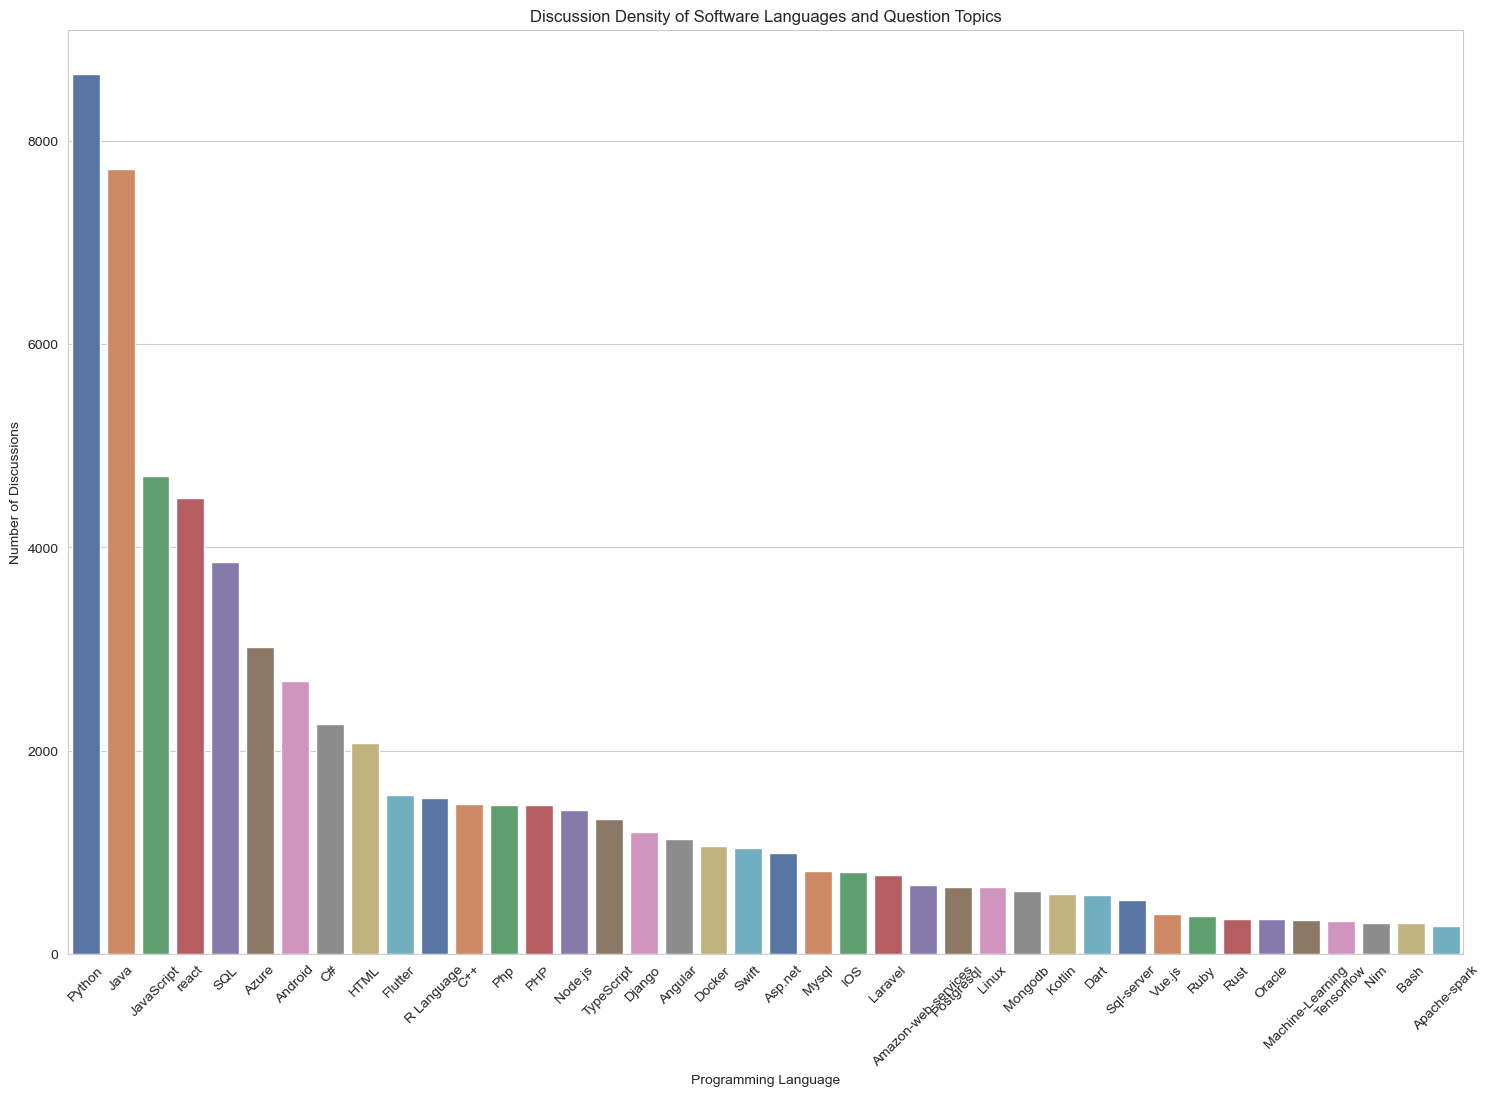

In [6]:
sns.set_style("whitegrid")

# Dil sayısına göre sıralama
counts = counts.sort_values(by="Count", ascending=False)
# İlk 40 satırı seçme ve tekrar counts değişkenine atama
counts = counts.head(40) 

# Bar grafiği oluşturma
plt.figure(figsize=(18, 12))
sns.barplot(x="Language", y="Count", data=counts, palette="deep")
plt.xticks(rotation=45)
plt.xlabel("Programming Language")
plt.ylabel("Number of Discussions")
plt.title("Discussion Density of Software Languages and Question Topics")
plt.show()

In [7]:
counts

,Language,Count
58,Python,8664
33,Java,7721
34,JavaScript,4702
73,react,4484
63,SQL,3857
9,Azure,3020
3,Android,2684
11,C#,2263
28,HTML,2075
24,Flutter,1561


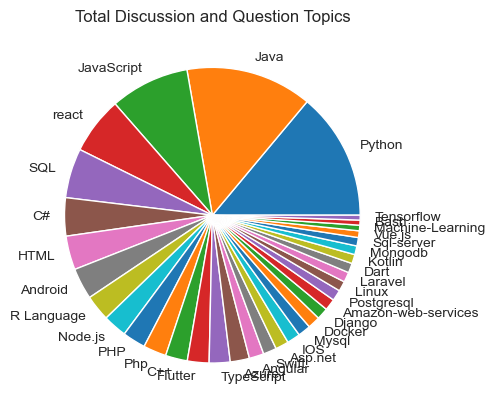

In [8]:
# CSV dosyası okunuyor.
df = pd.read_csv('output.csv')

# Dil sütunundaki tekil değerlerin sayısı hesaplanıyor.
counts = df['Language'].value_counts()
counts = counts.head(35)
# Pasta grafiği oluşturuluyor.
plt.pie(counts.values, labels=counts.index.tolist())
plt.title('Total Discussion and Question Topics')
plt.show()

In [9]:
# CSV dosyaları okunuyor.
df_links = pd.read_csv('stack_overflow_links.csv')
df_output = pd.read_csv('output.csv')

# Tarih sütunu ekleniyor.
df_output['Date'] = pd.to_datetime(df_links['Times'], format='%Y-%m-%d %H:%M:%S').dt.tz_localize(None)  # UTC değerleri kaldırılıyor

df_output['Date'] = pd.to_datetime(df_output['Date']).dt.tz_localize(None)  # UTC değerleri kaldırılıyor

In [10]:
df_output.head()

,Index,Sentence,Language,Count,Date
0,0,c++stringcompression,C++,1,2023-03-25 08:15:03
1,2,phplaravellaravel-artisanoctobercms,PHP,1,2023-03-25 08:15:02
2,2,phplaravellaravel-artisanoctobercms,Php,1,2023-03-25 08:14:42
3,2,phplaravellaravel-artisanoctobercms,Laravel,2,2023-03-25 08:13:51
4,3,c++windowsvisual-studiodll,C++,1,2023-03-25 08:13:07


Son 11 günlük zaman diliminde popüler olan ve en çok tartışılan diller.

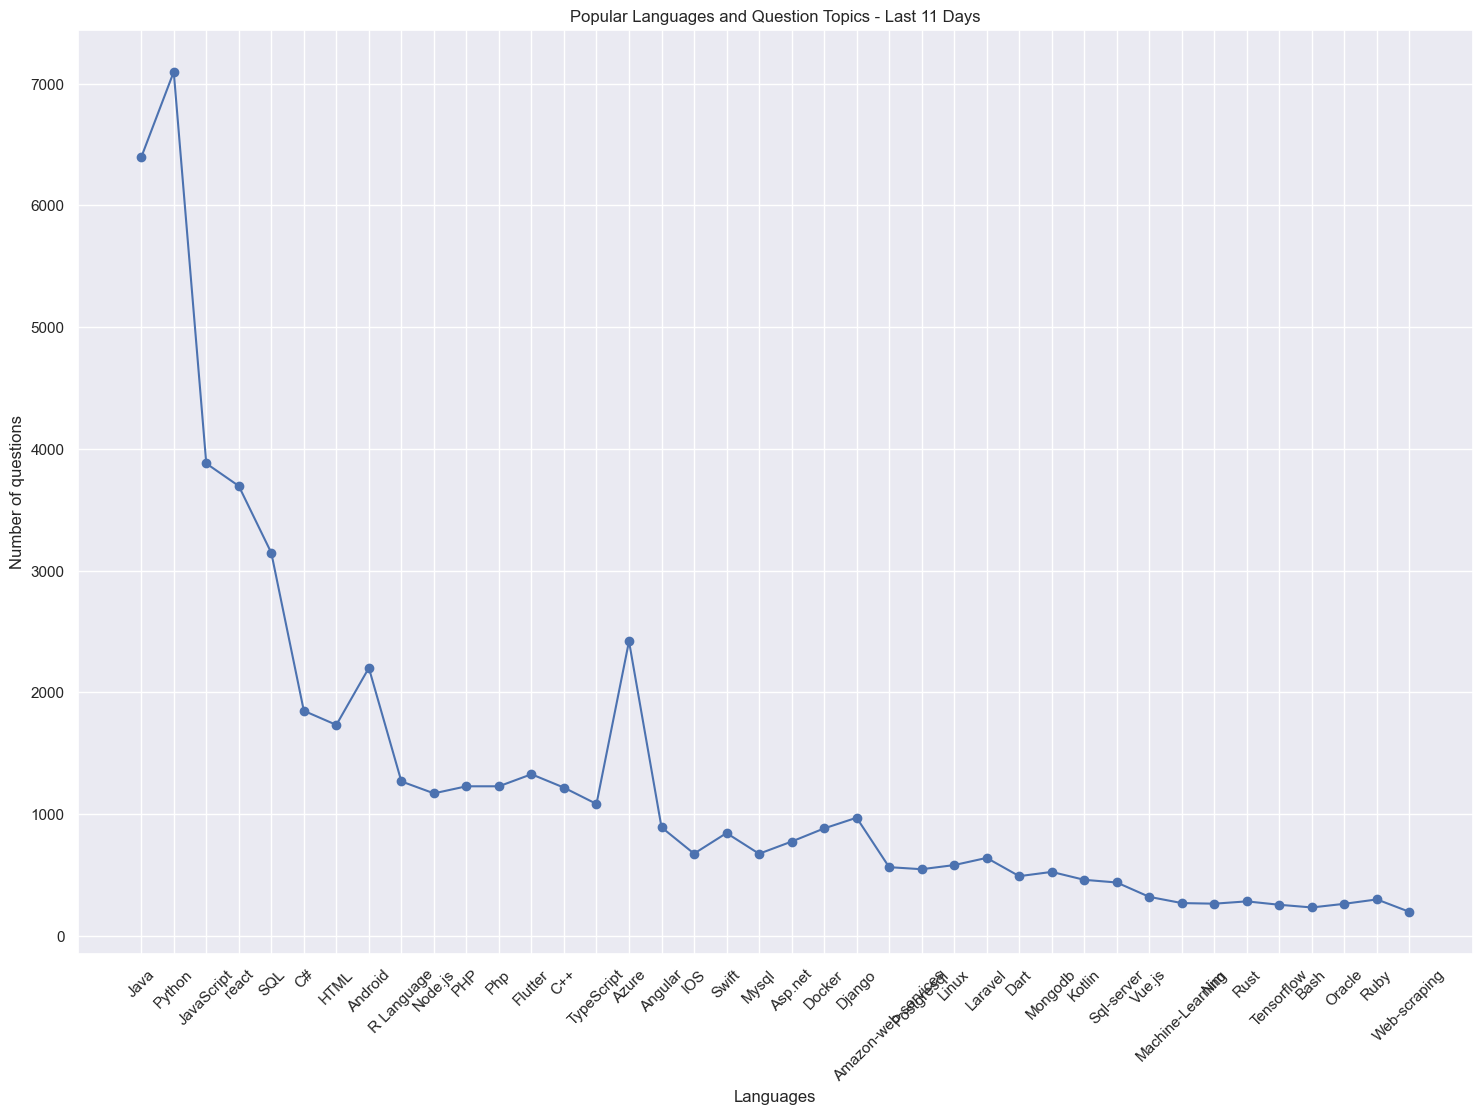

In [11]:
# Son 11 günlük zaman dilimi seçiliyor.
eleven_days_ago = pd.Timestamp.now() - pd.Timedelta(days=11)
df = df_output[df_output['Date'] >= eleven_days_ago]

# Dil sütunundaki tekil değerlerin sayısı hesaplanıyor.
counts = df['Language'].value_counts()
counts = counts.head(40)
# Dil adları listeye dönüştürülüyor.
languages = counts.index.tolist()

# Her dil için toplam sayısı hesaplanıyor.
totals = []
for lang in languages:
    total = df.loc[df['Language'] == lang, 'Count'].sum()
    totals.append(total)

# Çizgi grafiği oluşturuluyor.
sns.set()
sns.set_style('darkgrid')
plt.figure(figsize=(18, 12))
plt.plot(languages, totals, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Languages')
plt.ylabel('Number of questions')
plt.title('Popular Languages and Question Topics - Last 11 Days')
plt.show()

Dillerin sayısını ve frekansını karşılaştırmak için bir scatter plot grafiği oluşturabilirsiniz.

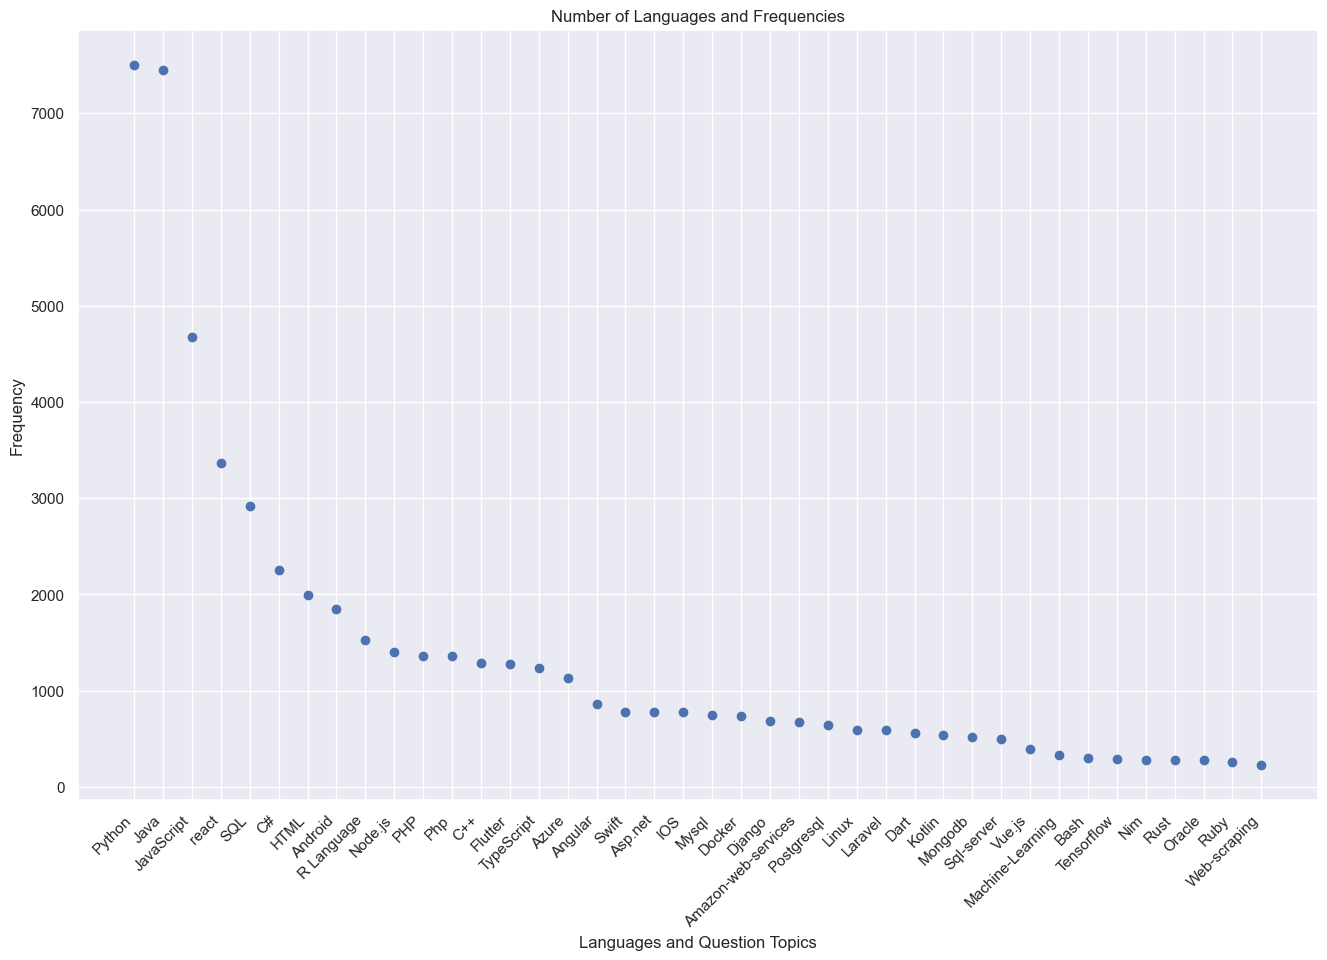

In [12]:
# CSV dosyası okunuyor.
df = pd.read_csv('output.csv')

# Dil sayısı hesaplanıyor.
num_langs = df['Language'].nunique()

# Dil frekansları hesaplanıyor.
counts = df['Language'].value_counts().head(40)
languages = counts.index.tolist()
freqs = counts.tolist()

# Scatter plot grafiği oluşturuluyor.
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(range(len(languages)), freqs, marker='o')
ax.set_xticks(range(len(languages)))
ax.set_xticklabels(languages, rotation=45, ha='right')
ax.set_xlabel('Languages and Question Topics')
ax.set_ylabel('Frequency')
ax.set_title('Number of Languages and Frequencies')
plt.show()

Birden fazla dilin birbirleriyle karşılaştırılması için bir gruplanmış çubuk grafiği oluşturabilirsiniz.

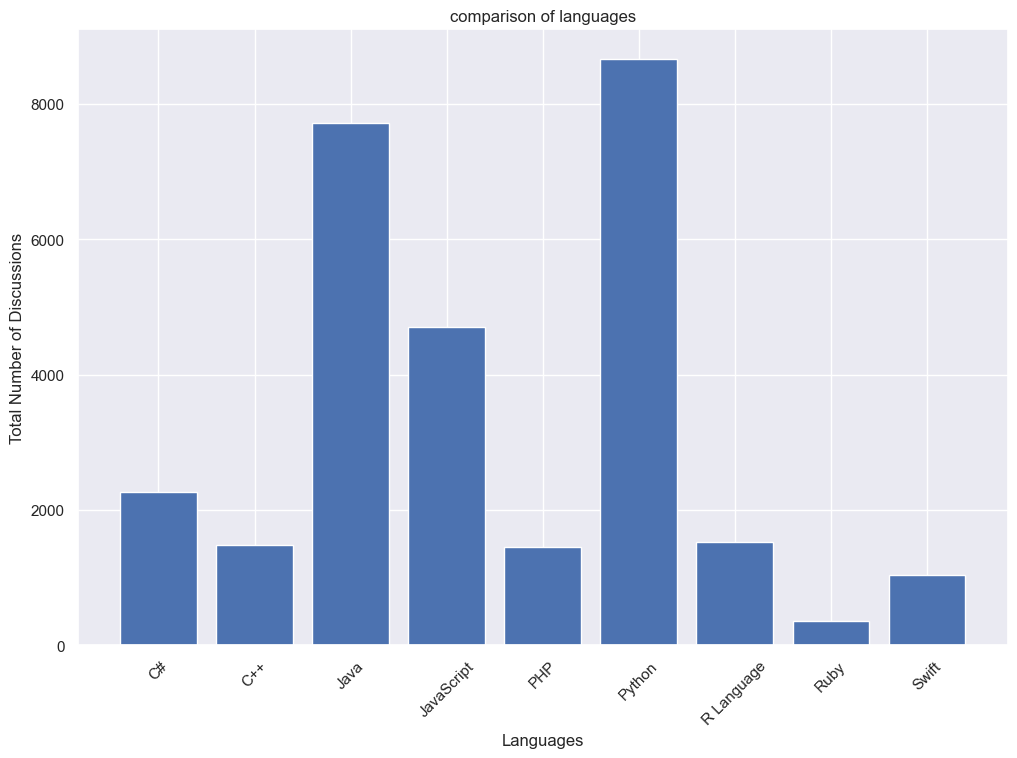

In [13]:
# CSV dosyası okunuyor.
df = df_output

# Dil sayısı sınırlandırılıyor.
limited_langs = ["Python", "Java", "JavaScript", "React", "C++", "C#", "PHP", "Ruby", "R Language", "Swift"]
df = df[df['Language'].isin(limited_langs)]

# Her dile ait toplam tartışma sayısı hesaplanıyor.
counts = df.groupby('Language')['Count'].sum().reset_index()

# Gruplanmış çubuk grafiği oluşturuluyor.
plt.figure(figsize=(12, 8))
plt.bar(range(len(counts)), counts['Count'])
plt.xticks(range(len(counts)), counts['Language'], rotation=45)
plt.xlabel('Languages')
plt.ylabel('Total Number of Discussions')
plt.title('comparison of languages')
plt.show()

Hangi dillerin birbirleriyle en çok tartışıldığını bulmak için bir heatmap grafiği oluşturabilirsiniz. (11 günlük)

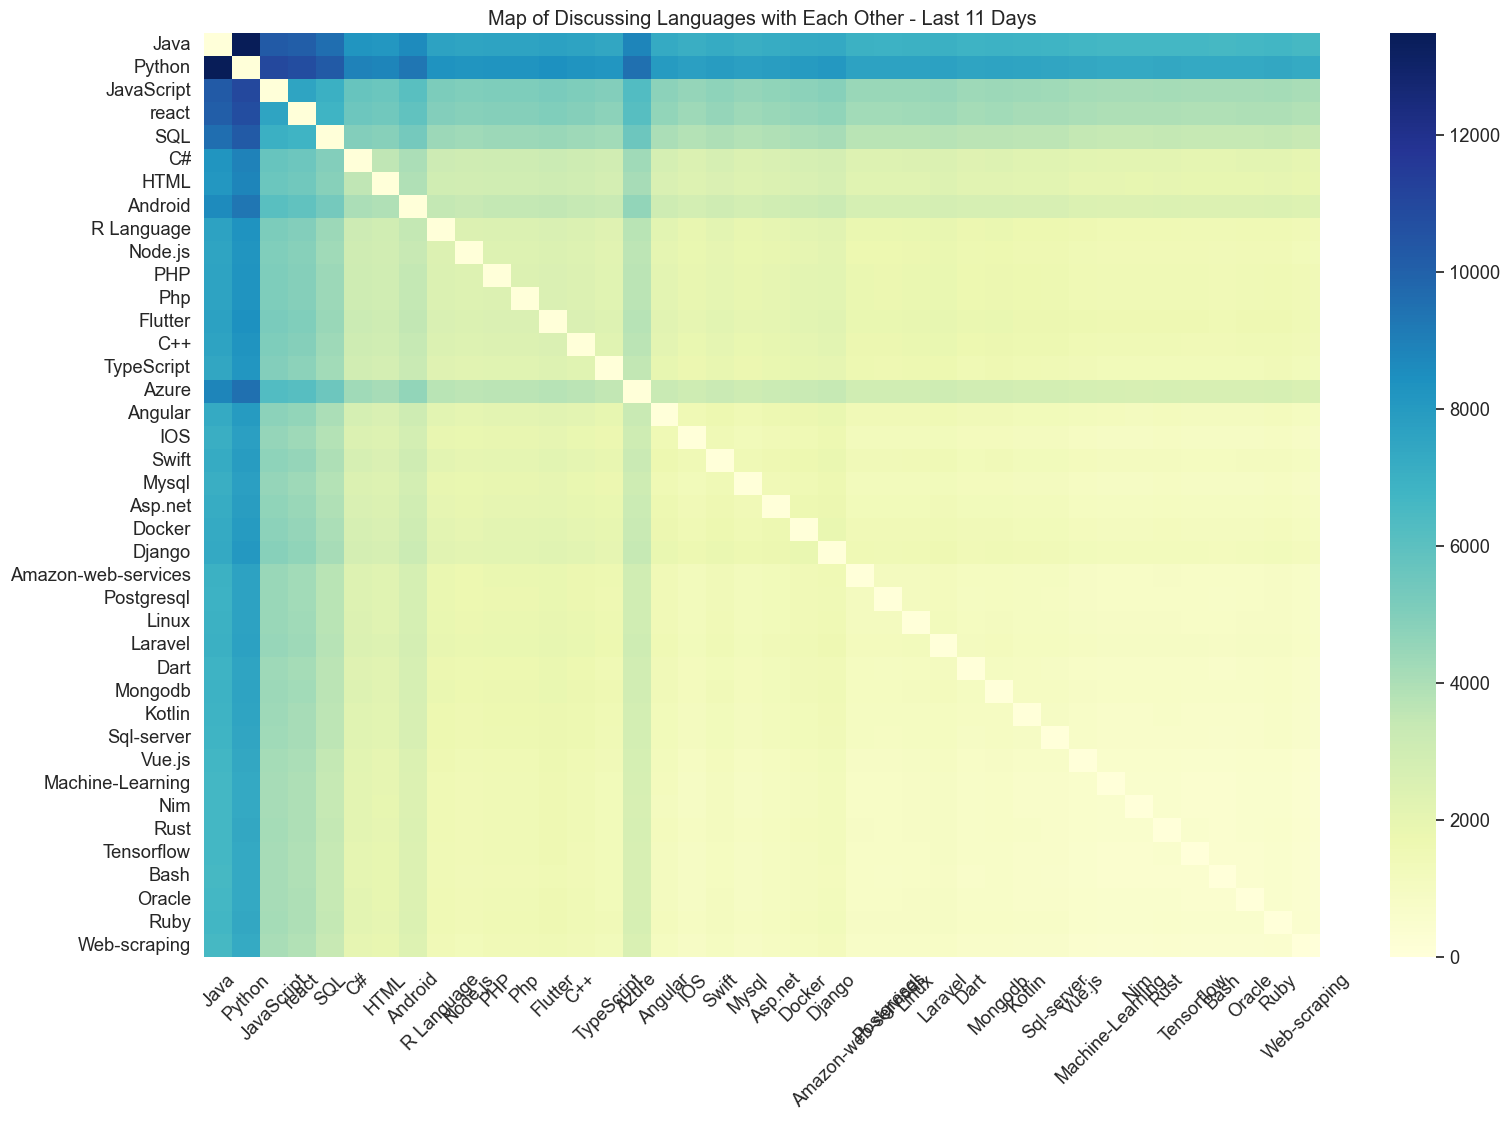

In [14]:
# Son 11 günlük zaman dilimi seçiliyor.
eleven_days_ago = pd.Timestamp.now() - pd.Timedelta(days=11)
df = df_output[df_output['Date'] >= eleven_days_ago]

# Dil sütunundaki tekil değerlerin sayısı hesaplanıyor.
counts = df['Language'].value_counts().head(40)

# Dil adları listeye dönüştürülüyor.
languages = counts.index.tolist()

# Dil sayısı
num_langs = len(languages)

# Boş bir dil-matrisi oluşturuluyor 
lang_matrix = [[0 for x in range(num_langs)] for y in range(num_langs)]

# Her iki dilin de bulunduğu tüm satırlar için matriste ilgili dillerin sayısı artırılıyor
for i in range(num_langs):
    for j in range(i+1, num_langs):
        lang1 = languages[i]
        lang2 = languages[j]
        total = df.loc[(df['Language'] == lang1) | (df['Language'] == lang2), 'Count'].sum()
        lang_matrix[i][j] = total
        lang_matrix[j][i] = total

# Heatmap grafiği oluşturuluyor.
plt.figure(figsize=(18,12))
sns.set(font_scale=1.2)
ax = sns.heatmap(lang_matrix, annot=False, xticklabels=languages, yticklabels=languages, cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Map of Discussing Languages with Each Other - Last 11 Days")
plt.show()

In [15]:
df_output['Date'] = pd.to_datetime(df_output['Date'], format='%Y-%m-%d %H:%M:%S')

In [16]:
df_output.head()

,Index,Sentence,Language,Count,Date
0,0,c++stringcompression,C++,1,2023-03-25 08:15:03
1,2,phplaravellaravel-artisanoctobercms,PHP,1,2023-03-25 08:15:02
2,2,phplaravellaravel-artisanoctobercms,Php,1,2023-03-25 08:14:42
3,2,phplaravellaravel-artisanoctobercms,Laravel,2,2023-03-25 08:13:51
4,3,c++windowsvisual-studiodll,C++,1,2023-03-25 08:13:07
